In [1]:
import numpy as np
from sklearn import datasets


digits = datasets.load_digits()
print(digits.data.shape)
print(np.unique(digits.target))
print(digits.data)

(1797, 64)
[0 1 2 3 4 5 6 7 8 9]
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


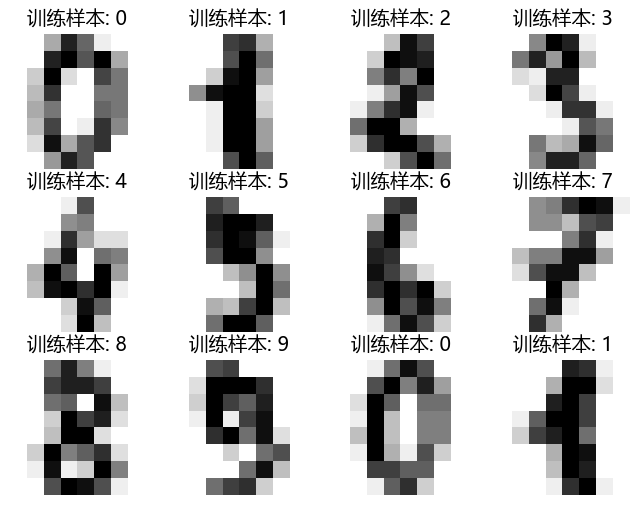

In [18]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 解决乱码问题
font_set = fm.FontProperties(fname='C:/Windows/Fonts/msyh.ttc', size=14)

images_and_labels = list(zip(digits.images, digits.target))

plt.figure(figsize=(8, 6))

for index, (image, label) in enumerate(images_and_labels[:12]):
    plt.subplot(3, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(u'训练样本: ' + str(label), fontproperties=font_set)

plt.show()

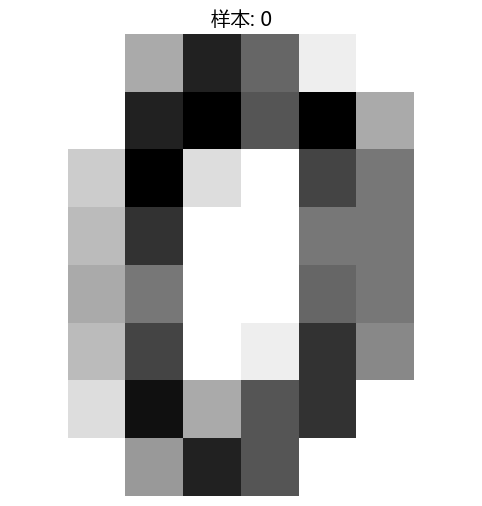

In [24]:
plt.figure(figsize=(8,6))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(u"样本: " + str(digits.target[0]), fontproperties=font_set)
plt.axis('off')
plt.show()

In [25]:
# 使用PCA进行降维
from sklearn.decomposition import *

pca = PCA(n_components=2)

result = pca.fit_transform(digits.data)

print(result.shape)

(1797, 2)


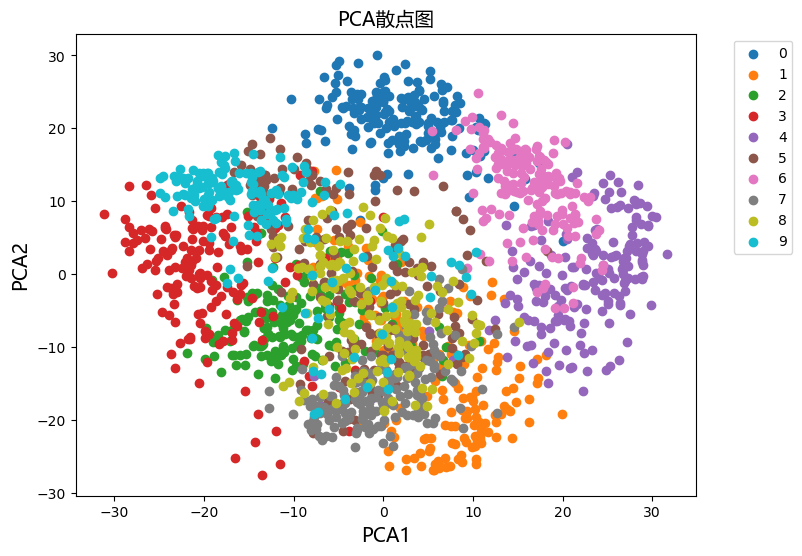

In [75]:
plt.figure(figsize=(8,6))
for i in range(10):
    x = result[:,0][digits.target == i]
    y = result[:,1][digits.target == i]
    plt.scatter(x, y)
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2)
plt.xlabel(u"PCA1", fontproperties=font_set)
plt.ylabel(u"PCA2", fontproperties=font_set)
plt.title(u"PCA散点图", fontproperties=font_set)
plt.show()

In [6]:
# 归一化
from sklearn.preprocessing import scale
data = scale(digits.data)
print(data)

[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]


In [107]:
# 划分数据集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, images_train, images_test = train_test_split(data, digits.target, digits.images, test_size=0.2, random_state=None)

print(f"训练集{X_train.shape}")
print(f"测试集{X_test.shape}")

训练集(1437, 64)
测试集(360, 64)


In [165]:
from sklearn import svm

svc_model = svm.SVC(gamma=0.1, C=100, kernel='linear')
svc_model.fit(X_train, y_train)
print(svc_model.score(X_test, y_test))

0.9805555555555555


In [150]:
svc_model = svm.SVC(gamma=0.001, C=10, kernel='rbf')
svc_model.fit(X_train, y_train)
print(svc_model.score(X_test, y_test))

0.9861111111111112


In [129]:
svc_model = svm.SVC(gamma='auto', C=10, kernel='rbf')
svc_model.fit(X_train, y_train)
print(svc_model.score(X_test, y_test))

0.9888888888888889


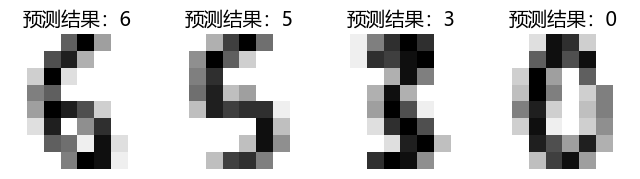

In [130]:
import matplotlib.pyplot as plt

predicted = svc_model.predict(X_test)

image_and_predictions = list(zip(images_test, predicted))

plt.figure(figsize=(8,2))
for index, (image, prediction) in enumerate(image_and_predictions[:4]):
    plt.subplot(1, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(u"预测结果：" + str(prediction), fontproperties=font_set)
plt.show()

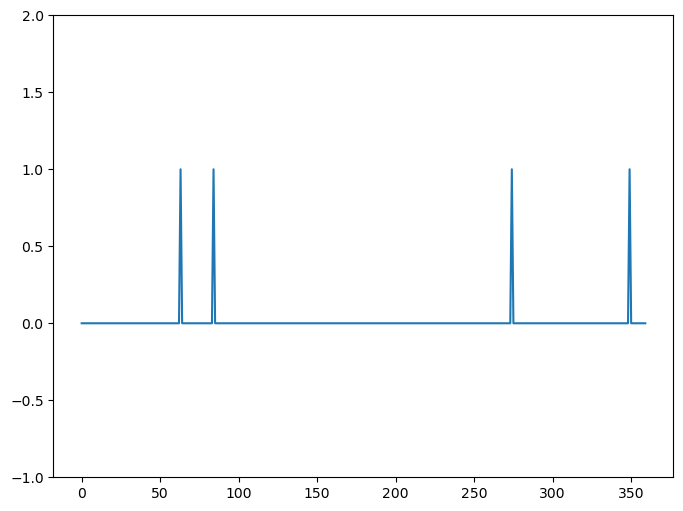

测试集数量:  360
错误识别数:  4
识别准确率:  0.9888888888888889


In [131]:
X = np.arange(len(y_test))

wrong_ = [0 if y1 == y2 else 1 for y1, y2 in zip(y_test, predicted)]

plt.figure(figsize=(8,6))
plt.plot(X, wrong_)
plt.ylim(-1, 2)
plt.show()

print("测试集数量: ", len(y_test))
print("错误识别数: ", sum(wrong_))
print("识别准确率: ", 1 - float(sum(wrong_)) / len(y_test))


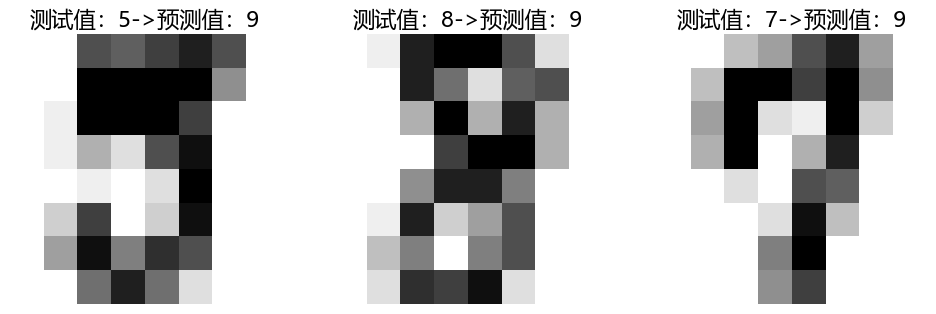

In [81]:
wrong = []
for i, value in enumerate(wrong_):
    if value: wrong.append(i)

plt.figure(figsize=(16,10))
for plot_index, image_index in enumerate(wrong):
    image = images_test[image_index]
    plt.subplot(2, 4, plot_index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    info = f"测试值：{y_test[image_index]}->预测值：{predicted[image_index]}"
    plt.title(info, fontsize=16, fontproperties=font_set)
plt.show()